In [6]:
import os
import collections
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sn


prior_prob={}

cond_prob0 = {}        #0 denotes ham
cond_prob1=  {}        #1 denotes spam
word_freq0 = {}
word_freq1 = {}


i =0
j =0

for docs in os.listdir('ham-train'):
    doc = open('ham-train' + '//' + docs,errors = 'ignore')
    word_freq0.update(collections.Counter(doc.read().split(" ")))   #dictionary with frequncy of each word in ham train         
   
    
    i+=1
    
    
for docs in os.listdir('spam-train'):
    doc = open('spam-train' + '//' + docs,errors = 'ignore')
    word_freq1.update(collections.Counter(doc.read().split(" ")))  #dictionary with frequncy of each word in spam - train      
                                     
   
    j+=1   
    
        
data_size = len(word_freq0)+len(word_freq1)   
data_size

299793

In [7]:
prior_prob['ham'] = i/(i+j)          
prior_prob['spam'] = j/(j+i)

print(prior_prob)             #prior probs for ham and spam

{'ham': 0.6011183597390494, 'spam': 0.39888164026095063}


In [8]:
for word in word_freq0.items():
    cond_prob0[word[0]] = (word[1]+1)/(sum(word_freq0.values())+data_size) #condprob for ham



for word in word_freq1.items():
    cond_prob1[word[0]] = (word[1]+1)/(sum(word_freq1.values())+data_size) #condprob for spam
print(len(cond_prob1),len(cond_prob0))    

155187 144606


In [9]:
true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0

In [11]:
for docs in os.listdir('spam1'):                  #testing for spam
    doc = open('spam1' + '//' + docs,errors = 'ignore')
    word_freqT1 = collections.Counter(doc.read().split(" "))
    spam_score = 0
    ham_score = 0
    spam_score += (np.log(prior_prob['spam']))
    ham_score += (np.log(prior_prob['ham']))
    
    
    for word in word_freqT1.items():
        if (word[0] in cond_prob0) and (word[0] in cond_prob1):
            
            spam_score += (np.log(cond_prob1[word[0]]))
            ham_score  += (np.log(cond_prob0[word[0]]))
            
        elif (word[0] in cond_prob0) and (word[0] not in cond_prob1):
            ham_score  += abs(np.log(cond_prob0[word[0]]))
            
        elif (word[0] in cond_prob1) and (word[0] not in cond_prob0):
            spam_score += abs(np.log(cond_prob1[word[0]]))
            
            
            
           
    if spam_score>ham_score:
        true_positive  +=1   
    else:
        false_negative+=1

In [12]:
for docs in os.listdir('ham'):            #testing for ham
    doc = open('ham' + '//' + docs,errors = 'ignore')
    word_freqT0 = collections.Counter(doc.read().split(" "))
    spam_score = 0
    ham_score = 0
    spam_score += (np.log(prior_prob['spam']))
    ham_score += (np.log(prior_prob['ham']))
    
    
    for word in word_freqT0.items():
        if (word[0] in cond_prob0) and (word[0] in cond_prob1):
            spam_score +=( np.log(cond_prob1[word[0]])*word[1])
            ham_score += (np.log(cond_prob0[word[0]])*word[1])
        elif (word[0] in cond_prob0) and (word[0] not in cond_prob1):
            ham_score  += abs(np.log(cond_prob0[word[0]]))
        elif (word[0] in cond_prob1) and (word[0] not in cond_prob0):
            spam_score += abs(np.log(cond_prob1[word[0]]))    
            
            
       
    if spam_score>ham_score:
        false_positive +=1
    else:
        true_negative +=1

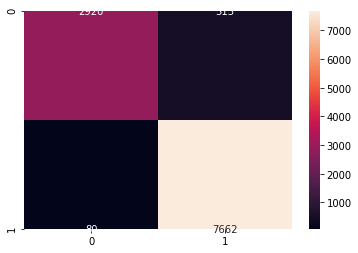

In [13]:
cf = [[true_negative,false_negative],[false_positive,true_positive]]
sn.heatmap(cf,annot = True,fmt = "d") #formatting confusion matrix to integers type

In [14]:
accuracy = (true_negative+true_positive)/(true_positive+true_negative+false_positive+false_negative)  
print((accuracy*100) )

94.69351230425056


In [ ]:
pickle.dumps({'condprob0':condprob0,'condprob1':condprob1,'prior_prob':prior_prob}) 

In [2]:

import pickle

with open('1.pickle', 'rb') as f:
    dicts = pickle.load(f)

    prior_prob = dicts['prior_prob']
    cond_prob0 = dicts['cond_prob0']
    cond_prob1 = dicts['cond_prob1']

In [3]:
prior_prob

{'ham': 0.6011183597390494, 'spam': 0.39888164026095063}

In [4]:
cond_prob0

{'Subject:': 4.314799113740262e-06,
 'christmas': 4.314799113740262e-06,
 'tree': 4.314799113740262e-06,
 'farm': 6.472198670610393e-06,
 'pictures\n': 4.314799113740262e-06,
 're': 6.472198670610393e-06,
 ':': 2.8046194239311703e-05,
 'rankings\nthank': 4.314799113740262e-06,
 'you': 1.2944397341220786e-05,
 '.': 6.472198670610393e-06,
 'key': 4.314799113740262e-06,
 'hr': 4.314799113740262e-06,
 'issues': 6.472198670610393e-06,
 'going': 6.472198670610393e-06,
 'forward\na': 4.314799113740262e-06,
 ')': 4.314799113740262e-06,
 'year': 4.314799113740262e-06,
 'end': 4.314799113740262e-06,
 'reviews': 4.314799113740262e-06,
 '-': 2.157399556870131e-05,
 'report': 1.0786997784350655e-05,
 'needs': 4.314799113740262e-06,
 'generating': 2.3731395125571443e-05,
 'like': 4.314799113740262e-06,
 'mid': 4.314799113740262e-06,
 'documenting': 4.314799113740262e-06,
 'business': 4.314799113740262e-06,
 'unit': 1.5101796898090917e-05,
 'performance': 6.472198670610393e-06,
 'on': 4.3147991137402